<a href="https://colab.research.google.com/github/sfsernao/Bootcamp_BSU_MIT/blob/main/Integrated_MZI_DiffTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Aim Photonics Academy
#INPHO-BOOT 2023

Mach-Zehnder Interferometer Different Temperatures
3 different temperatures and 2 different lengths.

- 138 um Long - 67.5 um Short

Passive waveguides and control of the temperature with the stage in the MapleLeaf Photonics system at the LEAP@BSU

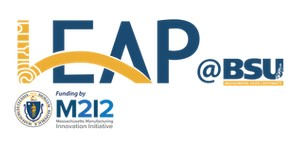

In [93]:
# Importing the different packages
from typing import Dict
from typing import List
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [12, 7]

In [94]:
MZI_L_T1="/content/MZI_Long_AmbTemp.csv"  #Edit this! Make sure it has been uploaded. 
# Remember to save copies of your plots in your google drive so you can access the plots later
# This is the MZI L: Long for T1: Temperature 1 which is room temperature

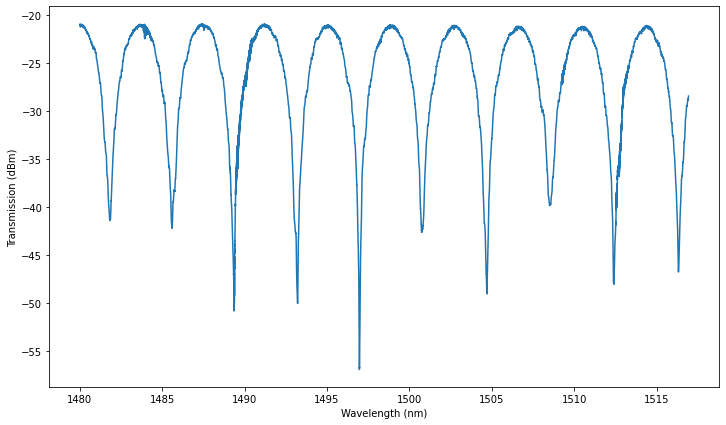

In [95]:
# Plot in dBm of the long MZI at room temperature
LT1=pd.read_csv(MZI_L_T1, sep=',' , skiprows=0, skip_blank_lines=True, header=None)

dataX_LT1=np.array(LT1.iloc[1:][0])   # Definition of the array for the wavelenghts in nanometers
dataY_LT1=np.array(LT1.iloc[1:][1])   # Definition of the power in dBm

# Plotting the data
fig, ax=plt.subplots()
ax.plot(dataX_LT1,dataY_LT1)
# Defining the labels
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dBm)')

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)

In [96]:
MZI_L_T2="/content/MZI_Long_30C.csv" # Long MZI with temperature 30C Arm difference to be calculated

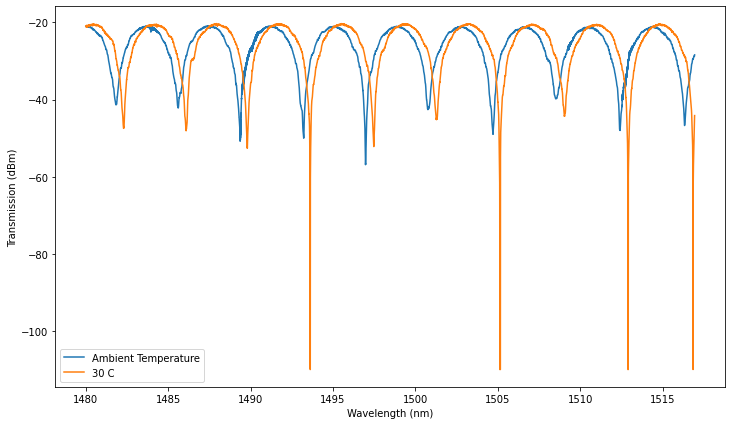

In [97]:
# Plot in dBm of the long MZI at 30C for the full stage
LT2=pd.read_csv(MZI_L_T2, sep=',' , skiprows=0, skip_blank_lines=True, header=None)

dataX_LT2=np.array(LT2.iloc[1:][0])   # Definition of the array for the wavelenghts in nanometers
dataY_LT2=np.array(LT2.iloc[1:][1])   # Definition of the power in dBm

# Plotting the data
fig, ax=plt.subplots()
ax.plot(dataX_LT1,dataY_LT1, label = 'Ambient Temperature')
ax.plot(dataX_LT2,dataY_LT2, label = '30 C')
# Defining the labels
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dBm)')
ax.legend()

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)

In [98]:
MZI_S_T1="/content/MZI_Short_30C.csv" # Long MZI with temperature 30C Arm difference to be calculated

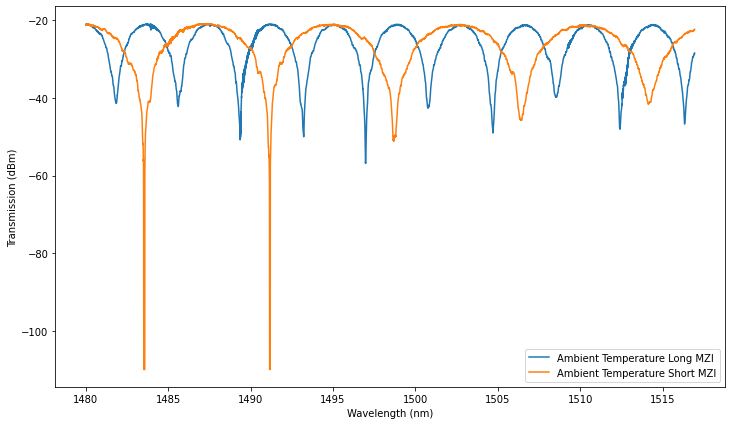

In [99]:
# Plot in dBm of the short MZI at room temperature 
ST1=pd.read_csv(MZI_S_T1, sep=',' , skiprows=0, skip_blank_lines=True, header=None)

dataX_ST1=np.array(ST1.iloc[1:][0])   # Definition of the array for the wavelenghts in nanometers
dataY_ST1=np.array(ST1.iloc[1:][1])   # Definition of the power in dBm

# Plotting the data
fig, ax=plt.subplots()
ax.plot(dataX_LT1,dataY_LT1, label = 'Ambient Temperature Long MZI')
ax.plot(dataX_ST1,dataY_ST1, label = 'Ambient Temperature Short MZI')
# Defining the labels
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dBm)')
ax.legend()

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)

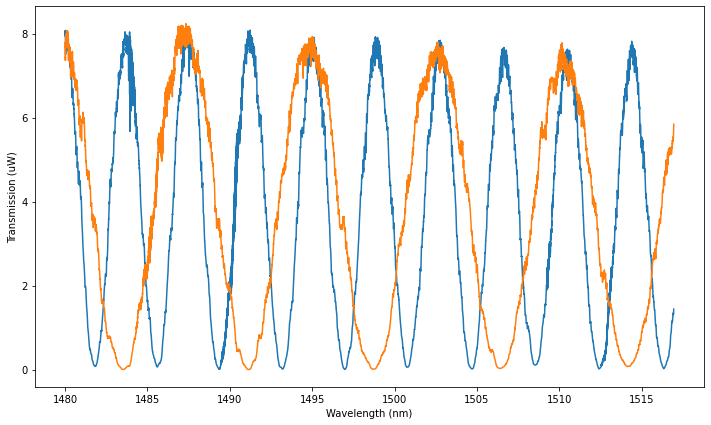

In [100]:
## Plot of the linear power
# Linearizing the power data (conversion from dBm to mW and multiplying by 1000 to convert into microWatts)
# Question for the students ; if you assume the coupling efficiency into and from the chip equal. What would be the efficiency if the input power is 1 mW
dataY_linear_LT1=10**(dataY_LT1/10)*1000
dataY_linear_ST1=10**(dataY_ST1/10)*1000

fig, ax=plt.subplots()
ax.plot(dataX_LT1,dataY_linear_LT1, label = 'Ambient Temperature Long MZI')
ax.plot(dataX_ST1,dataY_linear_ST1, label = 'Ambient Temperature Short MZI')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (uW)')

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)


In [101]:
# Normalization of the data, getting the values of the cosine between -1 and +1
Max_Trans_LT1=max(dataY_linear_LT1)
dataY_norm_LT1=(dataY_linear_LT1/Max_Trans_LT1)*2-1

Max_Trans_LT1=max(dataY_linear_LT1)
dataY_norm_LT1=(dataY_linear_LT1/Max_Trans_LT1)*2-1

Max_Trans_ST1=max(dataY_linear_ST1)
dataY_norm_ST1=(dataY_linear_ST1/Max_Trans_ST1)*2-1

Max_Trans_ST1=max(dataY_linear_ST1)
dataY_norm_ST1=(dataY_linear_ST1/Max_Trans_ST1)*2-1

-0.922443055084773 589809.7437310253
0.9312168015613965 289999.54342998576


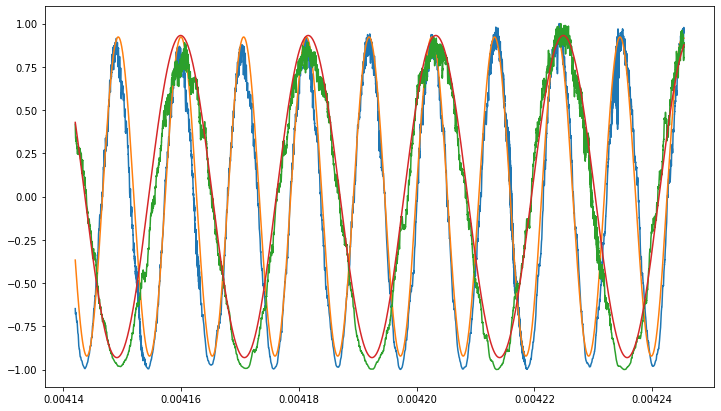

In [102]:
# Fitting the data into a cosine function
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

#But now x is a spatial frequency 2pi/lambda
datafreq_LT1=2*np.pi/dataX_LT1
datafreq_ST1=2*np.pi/dataX_ST1

# 1.63
guess = [1,590000]
parameters, covariance = curve_fit(cos_func, datafreq_LT1, dataY_norm_LT1, p0=guess)
fit_D_LT1 = parameters[0] # Fit for the amplitue
fit_E_LT1 = parameters[1] # Fit for the argument of the cosine

fit_cosine_LT1 = cos_func(datafreq_LT1, fit_D_LT1, fit_E_LT1)

guess = [1,290000]
parameters, covariance = curve_fit(cos_func, datafreq_ST1, dataY_norm_ST1, p0=guess)
fit_D_ST1 = parameters[0] # Fit for the amplitue
fit_E_ST1 = parameters[1] # Fit for the argument of the cosine

fit_cosine_ST1 = cos_func(datafreq_ST1, fit_D_ST1, fit_E_ST1)

plt.plot(datafreq_LT1, dataY_norm_LT1, label='data')
plt.plot(datafreq_LT1, fit_cosine_LT1, '-', label='fit')
plt.plot(datafreq_ST1, dataY_norm_ST1, label='data')
plt.plot(datafreq_ST1, fit_cosine_ST1, '-', label='fit')
ax.legend()
print (fit_D_LT1, fit_E_LT1)  # Print the found values for the amplitude and the argument of the cosine function
print (fit_D_ST1, fit_E_ST1)



In [103]:
# If the n_eff is the same in both arms, then cos(2pi/lambda*n_eff DeltaL)
# So, in our case, for the short Length, the DeltaL (in um) is fit_E_ST1*n_eff
n_eff=2.4
DeltaL_Short=(fit_E_ST1*n_eff)/1000
print(DeltaL_Short)
DeltaL_Long=(fit_E_LT1*n_eff)/1000
print(DeltaL_Long)

695.9989042319658
1415.5433849544606


4.127297321403247
4.25307183004812


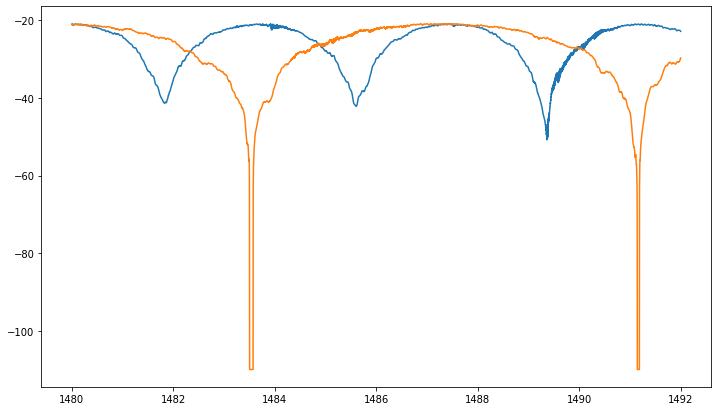

In [104]:
plt.plot(dataX_LT1[1:12000],dataY_LT1[1:12000], label = 'Ambient Temperature Long MZI')
plt.plot(dataX_ST1[1:12000],dataY_ST1[1:12000], label = 'Ambient Temperature Short MZI')

# How to find the minima?
# FSR[um]=lambda[um]**2/(ng*DeltaL[um])
# ng=lambda[um]**2/(FSR[um]*DeltaL[um])
# https://opg.optica.org/directpdfaccess/3a6dfe17-7d97-4547-90c77be9ce6639d6_89589/oe-14-9-3853.pdf?da=1&id=89589&seq=0&mobile=no

ng_Long=1.49**2/(0.00038*DeltaL_Long)
print(ng_Long)
ng_Short=1.49**2/(0.00075*DeltaL_Short)
print(ng_Short)

In [105]:
MZI_L_T3="/content/MZI_Long_35C.csv"  #Edit this! Make sure it has been uploaded. 
# Remember to save copies of your plots in your google drive so you can access the plots later
# This is the MZI L: Long for T1: Temperature 1 which is room temperature

In [106]:
# Plot in dBm of the short MZI at room temperature 
SL3=pd.read_csv(MZI_L_T3, sep=',' , skiprows=0, skip_blank_lines=True, header=None)

dataX_LT3=np.array(SL3.iloc[1:][0])   # Definition of the array for the wavelenghts in nanometers
dataY_LT3=np.array(SL3.iloc[1:][1])   # Definition of the power in dBm

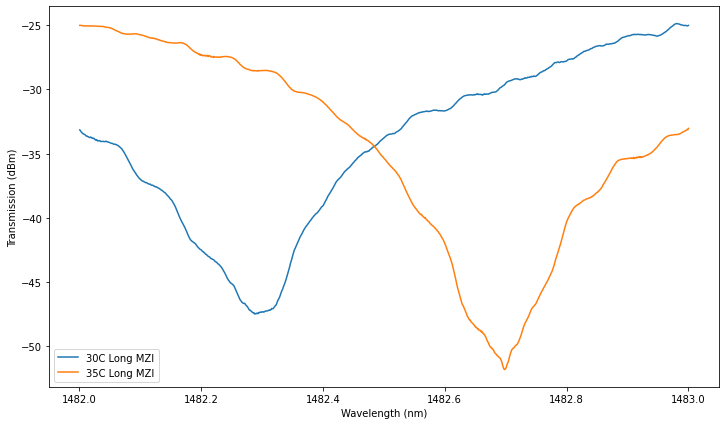

In [116]:
ni=2000
nf=3000
fig, ax=plt.subplots()
plt.plot(dataX_LT2[ni:nf],dataY_LT2[ni:nf], label = '30C Long MZI')
plt.plot(dataX_LT3[ni:nf],dataY_LT3[ni:nf], label = '35C Long MZI')
# Defining the labels
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dBm)')
ax.legend()

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)

In [123]:
# To calculate the thermo-optical coefficient, we need then
# dn_eff/dT=lambda2/DeltaT*(neff*(1/lambda1-1/lambda2))
lambda1=1482.3
lambda2=1482.7
DeltaT=5
neff=2.4
# Find them more precisely !
# neff= 2.4
Themoopt_Coeff=lambda2/DeltaT*(neff*(1/lambda1-1/lambda2))
print (Themoopt_Coeff)

0.00012952843553937362


In [126]:
# The reported value in the literatue for Themoopt_Coeff is 1.87*10**-4 K**-1
# It means that the 5C of the stage are not 5C on the waveguides, we can actually use this information to measure the change in temperature of the waveguides
DeltaT_wg=lambda2/(1.87*10**-4)*(neff*(1/lambda1-1/lambda2))
print (DeltaT_wg)

3.4633271534591867
